<a href="https://colab.research.google.com/github/Guiils/analise_de_dados/blob/main/Consumo_de_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE DE DEPUTADOS UTILIZANDO API**

##Instalando/importando Bibliotecas

In [ ]:
pip install requests

In [5]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##EXTRAÇÃO

In [37]:
# Requisição dos dados dos Deputados
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
# Os parametros tem função de filtro na requisição de uma API.
# Com isso podemos extrair somente o necessário
# ----> parametros = {'id': 73701} # Fazendo extração pelo id do deputado
parametros = {} # Vou deixar o parametro vazio para obter todos os dados
resposta   = requests.request("GET", url, params= parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

##Estruturando Dados

In [13]:
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             513 non-null    int64 
 1   uri            513 non-null    object
 2   nome           513 non-null    object
 3   siglaPartido   513 non-null    object
 4   uriPartido     513 non-null    object
 5   siglaUf        513 non-null    object
 6   idLegislatura  513 non-null    int64 
 7   urlFoto        513 non-null    object
 8   email          513 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.2+ KB


## Analisando dados da API

[]

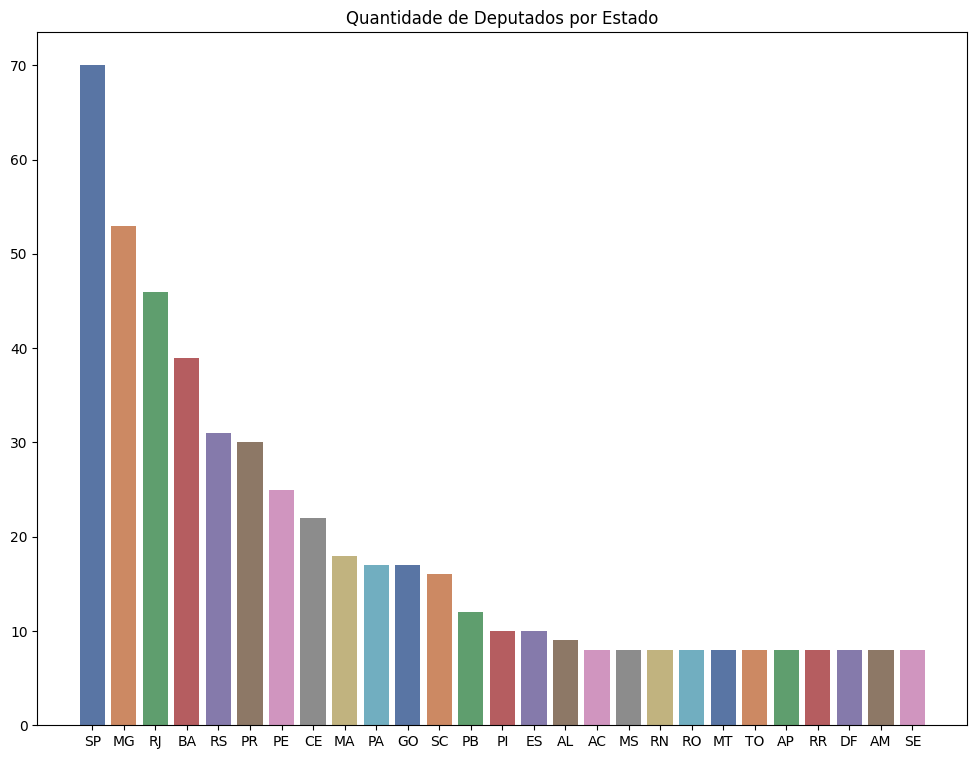

In [56]:
# Análise da quantidade de deputados pela UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (12, 9))
plt.title('Quantidade de Deputados por Estado')
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

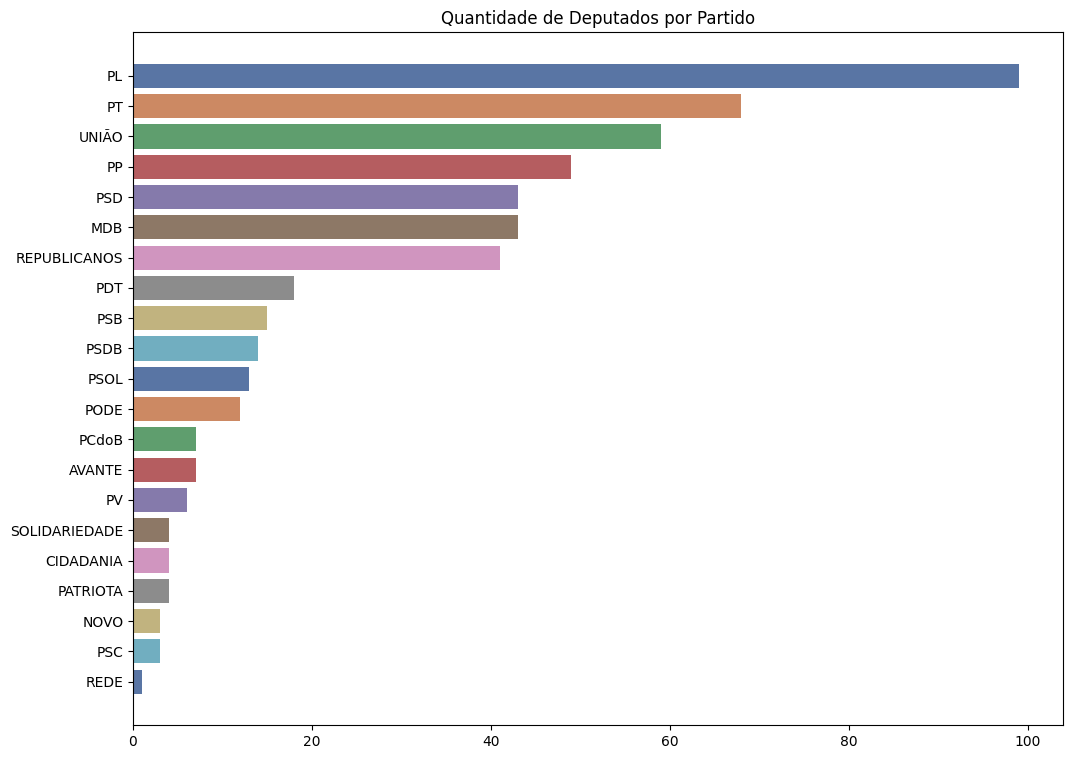

In [67]:
# Análise da quantidade de deputados por partido
x = df['siglaPartido'].value_counts().index
y = df['siglaPartido'].value_counts().values
plt.figure(figsize = (12, 9))
plt.title('Quantidade de Deputados por Partido')
sns.barplot(x=y, y=x, palette="deep")
plt.plot()

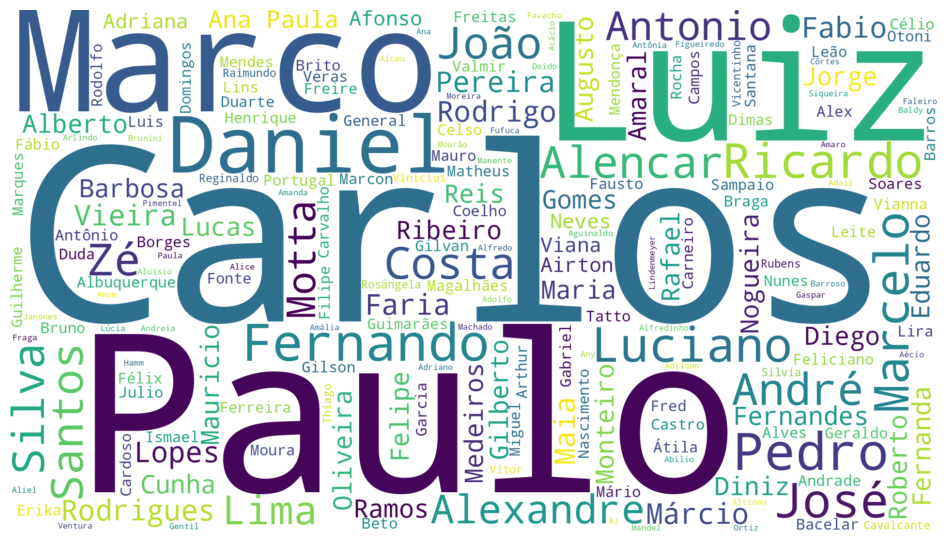

In [64]:
# Análise de nomes de deputados mais comuns
todos_itens = ' '.join(nome for nome in df['nome'].values)
stop_words = ['de', 'da', 'do', 'Dr','Delegado','Delegada','Coronel','Capitão',
              'Sargento', 'Prof', 'Pastor', 'Professora', 'Filho', 'Neto', 'Júnior', 'Jr']

# criar uma wordcloud
wc = WordCloud(stopwords=stop_words,
               background_color="white",
               width=1920, height=1080)
wordcloud = wc.generate(todos_itens)

# plotar wordcloud
fig, ax = plt.subplots(figsize=(12,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()